# Package loading and basic configurations

In [58]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import matplotlib.pyplot as plt
import scipy
from scipy.misc import derivative
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
from envirocar import TrackAPI, DownloadClient, BboxSelector, TimeSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks in the time interval. 

In [59]:
bbox = BboxSelector([
    7.603312, # min_x
    51.952343, # min_y
    7.65083, # max_x 
    51.974045,  # max_y 
])


# issue a query
track_df = track_api.get_tracks(bbox=bbox,  num_results=50) # requesting 50 tracks inside the bbox

In [60]:
one_track_id = track_df['track.id'].unique()[4]
one_track = track_df[track_df['track.id'] == one_track_id]
one_track

id                 time                  geometry  \
0    5e6b28e377e02d42aa7d0fe1  2020-03-12T17:43:10  POINT (7.65178 51.93495)   
1    5e6b28e377e02d42aa7d0fe3  2020-03-12T17:43:15  POINT (7.65183 51.93497)   
2    5e6b28e377e02d42aa7d0fe4  2020-03-12T17:43:20  POINT (7.65185 51.93480)   
3    5e6b28e377e02d42aa7d0fe5  2020-03-12T17:43:26  POINT (7.65236 51.93475)   
4    5e6b28e377e02d42aa7d0fe6  2020-03-12T17:43:31  POINT (7.65274 51.93444)   
..                        ...                  ...                       ...   
130  5e6b28e377e02d42aa7d1064  2020-03-12T17:54:08  POINT (7.65297 51.95383)   
131  5e6b28e377e02d42aa7d1065  2020-03-12T17:54:13  POINT (7.65299 51.95383)   
132  5e6b28e377e02d42aa7d1066  2020-03-12T17:54:18  POINT (7.65301 51.95381)   
133  5e6b28e377e02d42aa7d1067  2020-03-12T17:54:23  POINT (7.65301 51.95381)   
134  5e6b28e377e02d42aa7d1068  2020-03-12T17:54:29  POINT (7.65301 51.95382)   

     Calculated MAF.value Calculated MAF.unit  Intake Pressure.value  \
0                     NaN                 NaN                    NaN   
1                     NaN                 NaN                    NaN   
2                     NaN                 NaN                    NaN   
3                     NaN                 NaN                    NaN   
4                     NaN                 NaN                    NaN   
..                    ...                 ...                    ...   
130                   NaN                 NaN                    NaN   
131                   NaN                 NaN                    NaN   
132                   NaN                 NaN                    NaN   
133                   NaN                 NaN                    NaN   
134                   NaN                 NaN                    NaN   

    Intake Pressure.unit  CO2.value CO2.unit  Intake Temperature.value  ...  \
0                    NaN        NaN      NaN                       NaN  ...   
1                    NaN        NaN      NaN                       NaN  ...   
2                    NaN        NaN      NaN                       NaN  ...   
3                    NaN        NaN      NaN                       NaN  ...   
4                    NaN        NaN      NaN                       NaN  ...   
..                   ...        ...      ...                       ...  ...   
130                  NaN        NaN      NaN                       NaN  ...   
131                  NaN        NaN      NaN                       NaN  ...   
132                  NaN        NaN      NaN                       NaN  ...   
133                  NaN        NaN      NaN                       NaN  ...   
134                  NaN        NaN      NaN                       NaN  ...   

    sensor.constructionYear  sensor.manufacturer track.appVersion  \
0                      2012                  BMW              NaN   
1                      2012                  BMW              NaN   
2                      2012                  BMW              NaN   
3                      2012                  BMW              NaN   
4                      2012                  BMW              NaN   
..                      ...                  ...              ...   
130                    2012                  BMW              NaN   
131                    2012                  BMW              NaN   
132                    2012                  BMW              NaN   
133                    2012                  BMW              NaN   
134                    2012                  BMW              NaN   

     track.touVersion O2 Lambda Voltage ER.value  O2 Lambda Voltage ER.unit  \
0                 NaN                        NaN                        NaN   
1                 NaN                        NaN                        NaN   
2                 NaN                        NaN                        NaN   
3                 NaN                        NaN                        NaN   
4                 NaN       

## Add elevation

In [61]:
import requests as req
url = 'https://api.opentopodata.org/v1/eudem25m?locations='
def get_elvdata(lat,lng):
    access = url+str(lat)+(',')+str(lng)
    elevation = req.request('GET',access)
    data = eval(elevation.text)
    print(data) # debug code for everyone to check the request status
    return data['results'][0]['elevation']
for i in one_track.index:     
    one_track.loc[i,'elevation'] = get_elvdata(one_track.loc[i,'geometry'].y,one_track.loc[i,'geometry'].x)
#The request takes time
one_track

{'results': [{'elevation': 55.76268768310547, 'location': {'lat': 51.93495048766459, 'lng': 7.651782336187098}}], 'status': 'OK'}


c:\users\pablo\anaconda3\envs\energydem\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\pablo\anaconda3\envs\energydem\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


{'results': [{'elevation': 55.712318420410156, 'location': {'lat': 51.93497110400973, 'lng': 7.651832374399817}}], 'status': 'OK'}
{'results': [{'elevation': 55.80480194091797, 'location': {'lat': 51.93479948089254, 'lng': 7.651847605902519}}], 'status': 'OK'}
{'results': [{'elevation': 55.73940658569336, 'location': {'lat': 51.934749342797225, 'lng': 7.652361552459999}}], 'status': 'OK'}
{'results': [{'elevation': 55.97761535644531, 'location': {'lat': 51.934441969067734, 'lng': 7.65273624375139}}], 'status': 'OK'}
{'results': [{'elevation': 56.06355667114258, 'location': {'lat': 51.934276865836864, 'lng': 7.65286357535016}}], 'status': 'OK'}
{'results': [{'elevation': 55.84510803222656, 'location': {'lat': 51.93436620346489, 'lng': 7.6530891342549445}}], 'status': 'OK'}
{'results': [{'elevation': 55.61606979370117, 'location': {'lat': 51.93470892548684, 'lng': 7.6536264596716075}}], 'status': 'OK'}
{'results': [{'elevation': 55.9713134765625, 'location': {'lat': 51.93515214143271, 'l

KeyError: 'results'

## Calculate gradient(Elevation) & add time interval

In [62]:
def distance(lon1,lon2,lat1,lat2):
    R = 6370000 #radius
    φ1=lat1 * np.pi /180
    φ2 = lat2 * np.pi /180
    Δφ = (lat2-lat1) * np.pi /180
    Δλ = (lon2-lon1) * np.pi /180
    a = np.sin(Δφ/2) * np.sin(Δφ/2) +np.cos(φ1) * np.cos(φ2) *np.sin(Δλ/2) * np.sin(Δλ/2)
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a));
    return R * c
def gradient(height,distance):
    return np.arctan(height/distance) * 180/np.pi

for i in one_track.index:
    if (i == len(one_track)-1):
        break
    lat1= one_track.loc[i,'geometry'].y
    lat2= one_track.loc[i+1,'geometry'].y
    lon1= one_track.loc[i,'geometry'].x
    lon2= one_track.loc[i+1,'geometry'].x
    heightdiff = one_track.loc[i,'elevation']-one_track.loc[i+1,'elevation']
    one_track.loc[i+1,'seg_distance']= distance(lon1,lon2,lat1,lat2)
    one_track.loc[i,'gradient']= gradient(heightdiff,one_track.loc[i+1,'seg_distance'])

## Add interval time
j = 5
for i in one_track.index:
    one_track.loc[i, 'time_interval'] = j
    j = j+5

# Convert the speed unit to m/s
for i in one_track.index:
    one_track.loc[i, 'speed'] = one_track.loc[i, 'GPS Speed.value'] * 0.27777

## Getting the velocity equation & Calculate the acceleration

In [63]:

## get the speed equation
time_interval = np.array(one_track['time_interval'])
speed = np.array(one_track['speed'])
idx = np.isfinite(time_interval) & np.isfinite(speed)

def get_equation(x,y):
    degree = 80
    coefs, res, _, _, _ = np.polyfit(x,y,degree, full = True)
    ffit = np.poly1d(coefs)
    #print (ffit)
    return ffit

speed_equation = get_equation(time_interval[idx], speed[idx])

## calculate the acceleration using the derivative
j = 0
for i in one_track.index:
    if one_track.loc[i, 'speed'] == 0:
        one_track.loc[i, 'Acceleration'] = 0
    else:
        one_track.loc[i, 'Acceleration'] = derivative(speed_equation, one_track.loc[i, 'time_interval'])
    j = j+5




c:\users\pablo\anaconda3\envs\energydem\lib\site-packages\numpy\lib\polynomial.py:629: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\users\pablo\anaconda3\envs\energydem\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


## Filter the data

In [64]:
realistc_drive = one_track[['time','geometry','speed', 'track.length','seg_distance', 'sensor.fuelType', 'Acceleration', 'gradient']]
realistc_drive

time                  geometry     speed  track.length  \
0    2020-03-12T17:43:10  POINT (7.65178 51.93495)  0.821248      4.821775   
1    2020-03-12T17:43:15  POINT (7.65183 51.93497)  0.597299      4.821775   
2    2020-03-12T17:43:20  POINT (7.65185 51.93480)  4.027571      4.821775   
3    2020-03-12T17:43:26  POINT (7.65236 51.93475)  6.703896      4.821775   
4    2020-03-12T17:43:31  POINT (7.65274 51.93444)  5.521024      4.821775   
..                   ...                       ...       ...           ...   
130  2020-03-12T17:54:08  POINT (7.65297 51.95383)  0.000000      4.821775   
131  2020-03-12T17:54:13  POINT (7.65299 51.95383)  0.000000      4.821775   
132  2020-03-12T17:54:18  POINT (7.65301 51.95381)  0.001294      4.821775   
133  2020-03-12T17:54:23  POINT (7.65301 51.95381)  0.030658      4.821775   
134  2020-03-12T17:54:29  POINT (7.65301 51.95382)  0.000000      4.821775   

     seg_distance sensor.fuelType  Acceleration  gradient  
0             NaN          diesel      3.948788  0.699533  
1        4.125327          diesel      0.001335 -0.277295  
2       19.109169          diesel     -0.658674  0.105049  
3       35.667954          diesel     -0.155244 -0.319264  
4       42.748974          diesel      0.457819 -0.242262  
..            ...             ...           ...       ...  
130      2.003431          diesel      0.000000       NaN  
131      1.749858          diesel      0.000000       NaN  
132      1.993354          diesel      0.405947       NaN  
133      0.356133          diesel     -1.219897       NaN  
134      0.406198          diesel      0.000000       NaN  

[135 rows x 8 columns]

## Define General Parameters for the cars

In [65]:
m = 1500      # mass of the car  "kg"
A = 2         # cross-sectional of the car "m²"
P_air = 1.2   # Air mass density "kg per m³" 
P_idle = 2    # Idle power "kW"
Cw = 0.3      # Air drag cofficient 
H_g = 8.8     # Calorific value gasoline "kWh/l"
H_d = 9.9     # Calorific value diesel "kWh/l"
g = 9.81      # Gravitational acceleration "m/s²"

##  Define Parameters for vehicle

In [66]:
# m = mass of the car  "kg" 
# A = cross-sectional of the car "m²"
# Cw = Air drag cofficient 
class Car:
    def __init__(self,m=1500,A=2,Cw=0.3):
        self.m = m
        self.A = A
        self.Cw = Cw

##  Define specific paramerer by class (Volkswagen)
volks = Car(1570,2.179,0.32)
##generalcar = car
car = Car()
# check mass
print(volks.m,car.m)

1570 1500


## Define Driving_resistence + engine_power

In [67]:
def engine_power(car,Cr,gradient,speed,acceleration):
    if speed > 0:
        power =speed*(0.5*car.Cw*car.A*P_air*pow(speed,2) #driving resistance
                      +car.m*g*Cr*np.cos(gradient) #rolling resistence
                      +car.m*g*np.sin(gradient) # climbing resistance
                      +car.m*+acceleration) # inertial resistance)
        return [power,power/speed]
    else:
        return [P_idle,0]

#engine_power(volks,0.02,0.01,0.821248,3.948788) 

## driving resistance

In [68]:
## calculate the acceleration using the derivative # cr is set as an
for i in realistc_drive.index:
    ep = engine_power(car,0.02,realistc_drive.gradient[i],realistc_drive.speed[i],realistc_drive.Acceleration[i])
    realistc_drive.loc[i, 'engine_power'] = ep[0]
    realistc_drive.loc[i, 'driving_resistance'] = ep[1]

c:\users\pablo\anaconda3\envs\energydem\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\pablo\anaconda3\envs\energydem\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [69]:
realistc_drive

time                  geometry     speed  track.length  \
0    2020-03-12T17:43:10  POINT (7.65178 51.93495)  0.821248      4.821775   
1    2020-03-12T17:43:15  POINT (7.65183 51.93497)  0.597299      4.821775   
2    2020-03-12T17:43:20  POINT (7.65185 51.93480)  4.027571      4.821775   
3    2020-03-12T17:43:26  POINT (7.65236 51.93475)  6.703896      4.821775   
4    2020-03-12T17:43:31  POINT (7.65274 51.93444)  5.521024      4.821775   
..                   ...                       ...       ...           ...   
130  2020-03-12T17:54:08  POINT (7.65297 51.95383)  0.000000      4.821775   
131  2020-03-12T17:54:13  POINT (7.65299 51.95383)  0.000000      4.821775   
132  2020-03-12T17:54:18  POINT (7.65301 51.95381)  0.001294      4.821775   
133  2020-03-12T17:54:23  POINT (7.65301 51.95381)  0.030658      4.821775   
134  2020-03-12T17:54:29  POINT (7.65301 51.95382)  0.000000      4.821775   

     seg_distance sensor.fuelType  Acceleration  gradient  engine_power  \
0             NaN          diesel      3.948788  0.699533  12830.366109   
1        4.125327          diesel      0.001335 -0.277295  -2235.757535   
2       19.109169          diesel     -0.658674  0.105049   3437.357430   
3       35.667954          diesel     -0.155244 -0.319264 -30541.785808   
4       42.748974          diesel      0.457819 -0.242262 -14060.430296   
..            ...             ...           ...       ...           ...   
130      2.003431          diesel      0.000000       NaN      2.000000   
131      1.749858          diesel      0.000000       NaN      2.000000   
132      1.993354          diesel      0.405947       NaN           NaN   
133      0.356133          diesel     -1.219897       NaN           NaN   
134      0.406198          diesel      0.000000       NaN      2.000000   

     driving_resistance  
0          15623.013565  
1          -3743.113866  
2            853.456729  
3          -4555.826385  
4          -2546.707089  
..                  ...  
130            0.000000  
131            0.000000  
132                 NaN  
133                 NaN  
134            0.000000  

[135 rows x 10 columns]

In [71]:
realistc_drive.describe()

speed  track.length  seg_distance  Acceleration   gradient  \
count  135.000000    135.000000    134.000000    135.000000  13.000000   
mean     6.982486      4.821775     35.899125      0.003078  -0.130078   
std      6.355497      0.000000     31.595623      0.437717   0.483394   
min      0.000000      4.821775      0.016204     -1.219897  -0.769285   
25%      0.064132      4.821775      4.075517     -0.159170  -0.319264   
50%      5.376741      4.821775     27.887552      0.000000  -0.242262   
75%     12.067139      4.821775     62.498571      0.065278   0.105049   
max     20.820667      4.821775    114.191231      3.948788   0.699533   

        engine_power  driving_resistance  
count      41.000000           41.000000  
mean    -6474.012973         -364.451243  
std     25429.964722         4410.475078  
min   -120500.339590       -11016.119553  
25%         2.000000            0.000000  
50%         2.000000            0.000000  
75%         2.000000            0.000000  
max     32164.521636        15623.013565

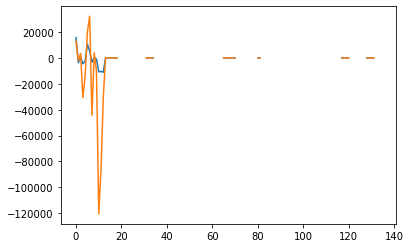

In [85]:
plt.plot(realistc_drive['driving_resistance'])
plt.plot(realistc_drive['engine_power'])
plt.show()

## Import OSM Network, in the same area of tracks

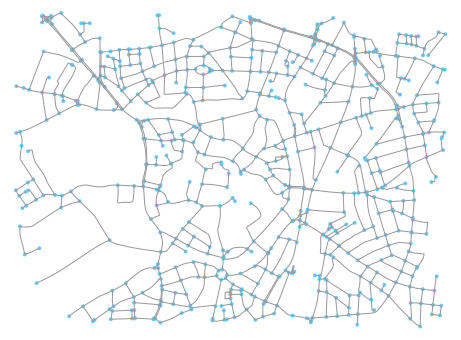

(<Figure size 576.497x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25bc620d148>)

In [11]:
import osmnx as ox

G = ox.graph_from_bbox(51.974045, 51.952343, 7.65083, 7.603312, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

## Convert the OSM Netwok to geodataframe and filter the attributes

In [14]:
nodes, streets = ox.graph_to_gdfs(G)
road_network = streets[['maxspeed','length','surface']]
road_network
#to check the type of surface "for rolling coff."
for i in road_network.index:
    if road_network.loc[i, 'surface'] == "asphalt":
        road_network.loc[i, 'rolling_resistance'] = 0.02 # source: engineeringtoolbox.com
    elif road_network.loc[i, 'surface'] == "cobblestone":
        road_network.loc[i, 'rolling_resistance'] = 0.015 # source: engineeringtoolbox.com
    elif road_network.loc[i, 'surface'] == "paving_stones":
        road_network.loc[i, 'rolling_resistance'] = 0.033 # source: The Automotive Chassis book
    else:
        road_network.loc[i, 'rolling_resistance'] = 0.02
        
road_network

maxspeed   length  surface  rolling_resistance
0         50    6.146  asphalt                0.02
1         50  200.247  asphalt                0.02
2         30   12.933  asphalt                0.02
3         50   96.147  asphalt                0.02
4        NaN  119.161  asphalt                0.02
..       ...      ...      ...                 ...
915       30   68.594  asphalt                0.02
916       30   56.319  asphalt                0.02
917      NaN   56.935      NaN                0.02
918       30   81.071  asphalt                0.02
919       30   95.104  asphalt                0.02

[920 rows x 4 columns]